In [1]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding
from keras.layers import LSTM, SpatialDropout1D
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
# Устанавливаем seed для повторяемости результатов
np.random.seed(42)
# Максимальное количество слов (по частоте использования)
max_features = 5000
# Максимальная длина рецензии в словах
maxlen = 80

In [3]:
# Загружаем данные
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

17326080/17464789 [============================>.] - ETA: 0s  

In [4]:
# Заполняем или обрезаем рецензии
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [5]:
# Создаем сеть
model = Sequential()
# Слой для векторного представления слов
model.add(Embedding(max_features, 32))
model.add(SpatialDropout1D(0.2))
# Слой долго-краткосрочной памяти
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2)) 
# Полносвязный слой
model.add(Dense(1, activation="sigmoid"))

In [7]:
from keras.callbacks import TensorBoard  
tensorboard = TensorBoard(log_dir='../logs/', write_graph=True)

In [12]:
model.compile?

In [13]:
# Копмилируем модель
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

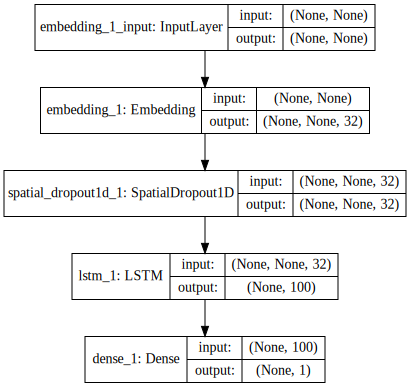

In [14]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

**Обучаем модель**

In [15]:
%%time
model.fit(X_train, y_train, batch_size=64, epochs=7,
          validation_data=(X_test, y_test), callbacks=[tensorboard], verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/7
71s - loss: 0.5192 - acc: 0.7295 - val_loss: 0.4027 - val_acc: 0.8239
Epoch 2/7
67s - loss: 0.3695 - acc: 0.8408 - val_loss: 0.4092 - val_acc: 0.8168
Epoch 3/7
68s - loss: 0.3368 - acc: 0.8604 - val_loss: 0.3864 - val_acc: 0.8305
Epoch 4/7
67s - loss: 0.3159 - acc: 0.8686 - val_loss: 0.3772 - val_acc: 0.8343
Epoch 5/7
71s - loss: 0.2975 - acc: 0.8787 - val_loss: 0.3826 - val_acc: 0.8367
Epoch 6/7
69s - loss: 0.2852 - acc: 0.8842 - val_loss: 0.4121 - val_acc: 0.8288
Epoch 7/7
69s - loss: 0.2695 - acc: 0.8930 - val_loss: 0.4010 - val_acc: 0.8328
CPU times: user 50min 39s, sys: 15min 14s, total: 1h 5min 53s
Wall time: 8min 8s


In [16]:
# Проверяем качество обучения на тестовых данных
scores = model.evaluate(X_test, y_test,
                        batch_size=64)
print("Точность на тестовых данных: %.2f%%" % (scores[1] * 100))

24960/25000 [============================>.] - ETA: 0s 